In [5]:
import TurbPy as tb
from TurbPy.imports import *

In [6]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
deck = 'KH_400ppc_200wci2/'


dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

lx = np.linspace(0, info['Lx/di'], int(info['nx']))
ly = np.linspace(0, info['Ly/di'], int(info['ny']))

In [7]:
ds = tb.load_vars(dirs, times[0])

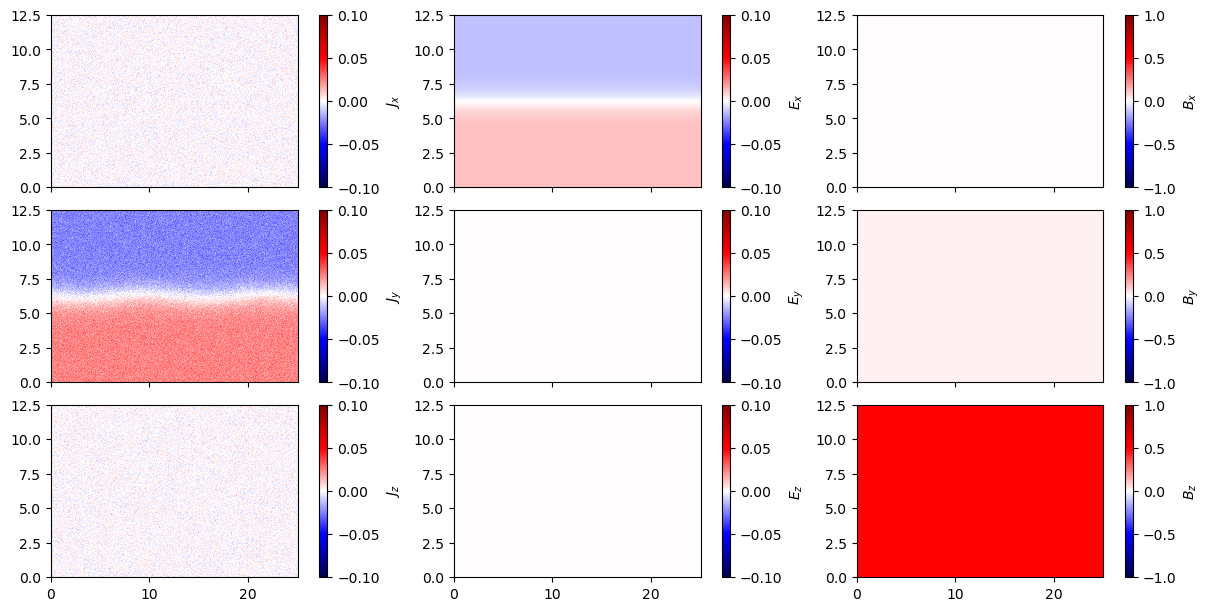

In [31]:
fig, axs = plt.subplots(3,3, figsize=(12, 6), sharex = True, layout='constrained')
seis = 'seismic'

cm0 = axs[0,0].pcolormesh(ly,lx,ds['jx'], cmap = seis, vmin = -0.1, vmax = 0.1) 
cm1 = axs[1,0].pcolormesh(ly,lx,ds['jy'], cmap = seis, vmin = -0.1, vmax = 0.1) 
cm2 = axs[2,0].pcolormesh(ly,lx,ds['jz'], cmap = seis, vmin = -0.1, vmax = 0.1)
cm3 = axs[0,1].pcolormesh(ly,lx,ds['ex'], cmap = seis, vmin = -0.1, vmax = 0.1) 
cm4 = axs[1,1].pcolormesh(ly,lx,ds['ey'], cmap = seis, vmin = -0.1, vmax = 0.1) 
cm5 = axs[2,1].pcolormesh(ly,lx,ds['ez'], cmap = seis, vmin = -0.1, vmax = 0.1)
cm6 = axs[0,2].pcolormesh(ly,lx,ds['cbx'], cmap = seis, vmin = -1, vmax = 1) 
cm7 = axs[1,2].pcolormesh(ly,lx,ds['cby'], cmap = seis, vmin = -1, vmax = 1) 
cm8 = axs[2,2].pcolormesh(ly,lx,ds['cbz'], cmap = seis, vmin = -1, vmax = 1)

fig.colorbar(cm0, label = r'$J_x$')
fig.colorbar(cm1, label = r'$J_y$')
fig.colorbar(cm2, label = r'$J_z$')

fig.colorbar(cm3, label = r'$E_x$')
fig.colorbar(cm4, label = r'$E_y$')
fig.colorbar(cm5, label = r'$E_z$')

fig.colorbar(cm6, label = r'$B_x$')
fig.colorbar(cm7, label = r'$B_y$')
fig.colorbar(cm8, label = r'$B_z$')

plt.savefig(figs + 'initial.jpg')